In [1]:
from IPython import display

# Deep Q-Learning

**Quick Q-Learning Recap:**

Reinforcement Learning can broadly be separated into two groups: model free and model based RL algorithms. Model free RL algorithms don’t learn a model of their environment’s transition function to make predictions of future states and rewards.

Q-learning is a model-free reinforcement learning algorithm to learn the value of an action in a particular state. As Q-Learning is model-free it can handle problems with stochastic transitions and rewards without requiring adaptations. 

**How Q-learning works:**

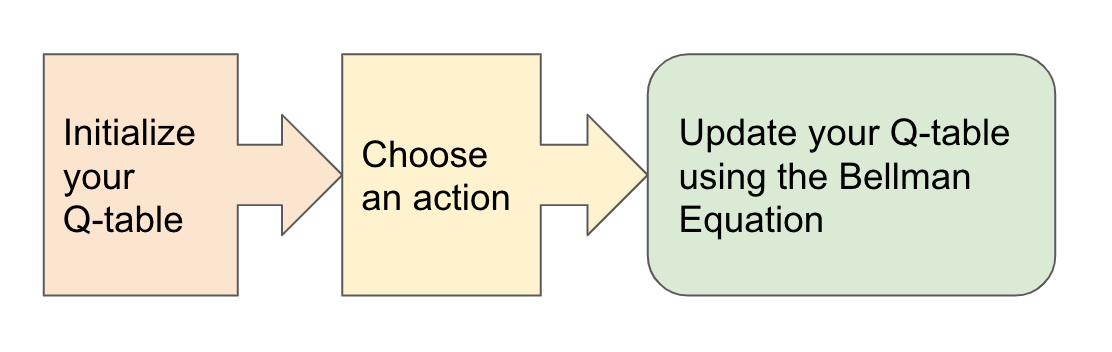

Source: Mike Wang, https://towardsdatascience.com/

- $S$ - is a set of states called the state space \ observation space.

- $A$ - is a set of actions called the action space.

- $R:S\times A\times S'\rightarrow \mathbb{R}$ - is the immediate reward (or expected immediate reward) received after transitioning from state $S$ to state $S'$, due to action $A$. (In this tutorial we will use the following formula - $R:S\times A\rightarrow \mathbb{R}$)

- $\gamma \in [0,1]$ - discount factor.

- $\alpha \in (0,1]$ - learning rate \ step size.

- <b>$Q:S\times A\rightarrow \mathbb{R}$ - Q function \ Q table</b>

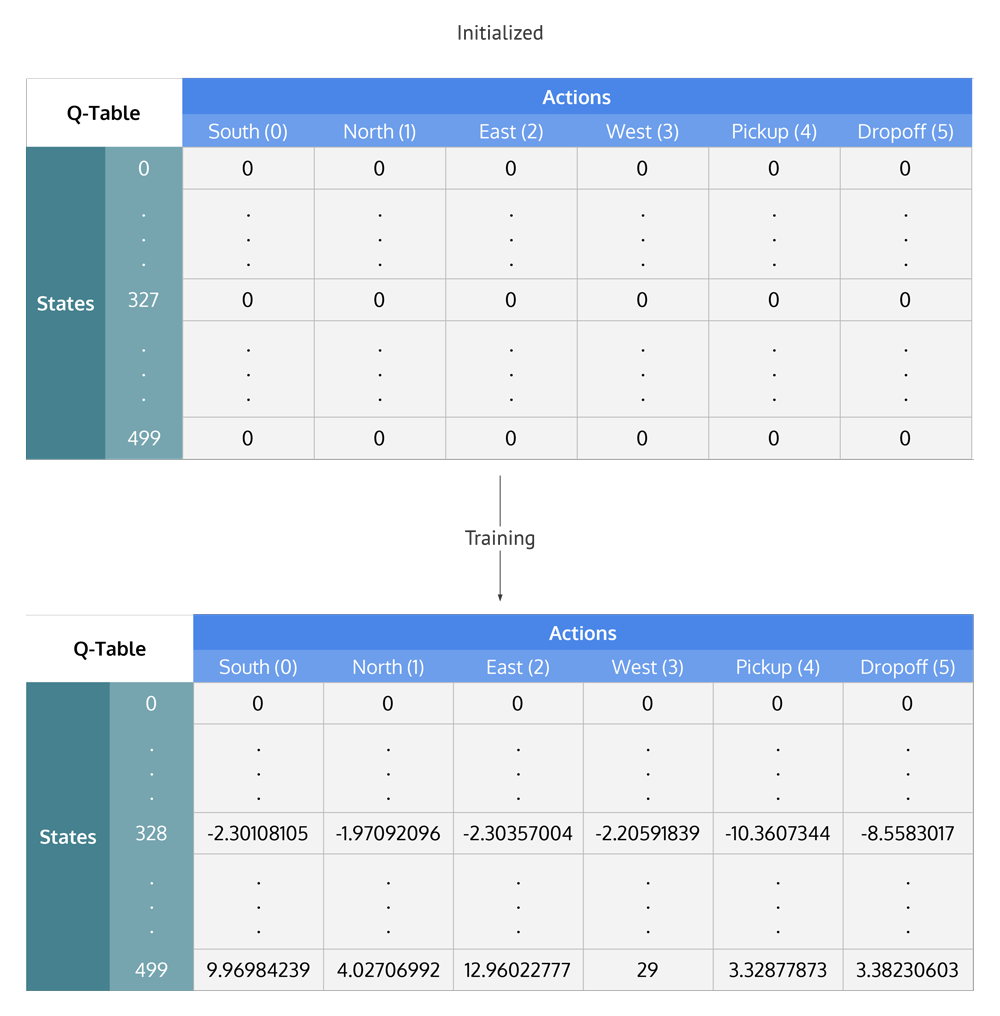

Source: https://en.wikipedia.org/wiki/Q-learning

**Bellman Equation variation for approximation**

To update the Q-table we use Bellman Equasion

q_new_val.svg

**How Deep Q-Learning works**

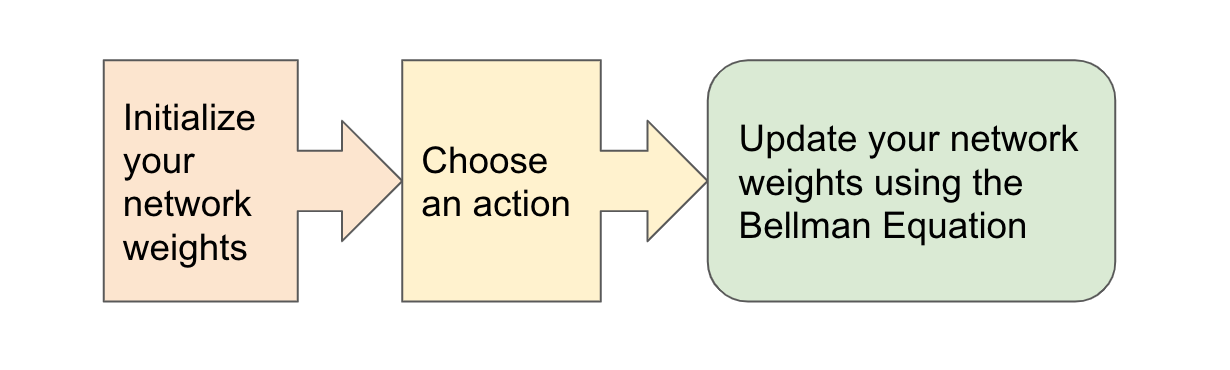

Source: Mike Wang, https://towardsdatascience.com/

A core difference between Deep Q-Learning and Vanilla Q-Learning is the implementation of the Q-table. Deep Q-Learning replaces the regular Q-table with a neural network. Rather than mapping a state-action pair to a q-value, a neural network maps input states to (action, Q-value) pairs.



A deep neural network (DNN) is an neural network with multiple layers between the input and output layers.

In a general fully connected NN each neuron is a multivariate function that's composed of 3 parts - A weight vector, a bias term (scalar) and an activation function. For any input vector, the neuron takes the inner product of the input with the weights, adds the bias, and then activates the activaion function over the result (which is a scalar).

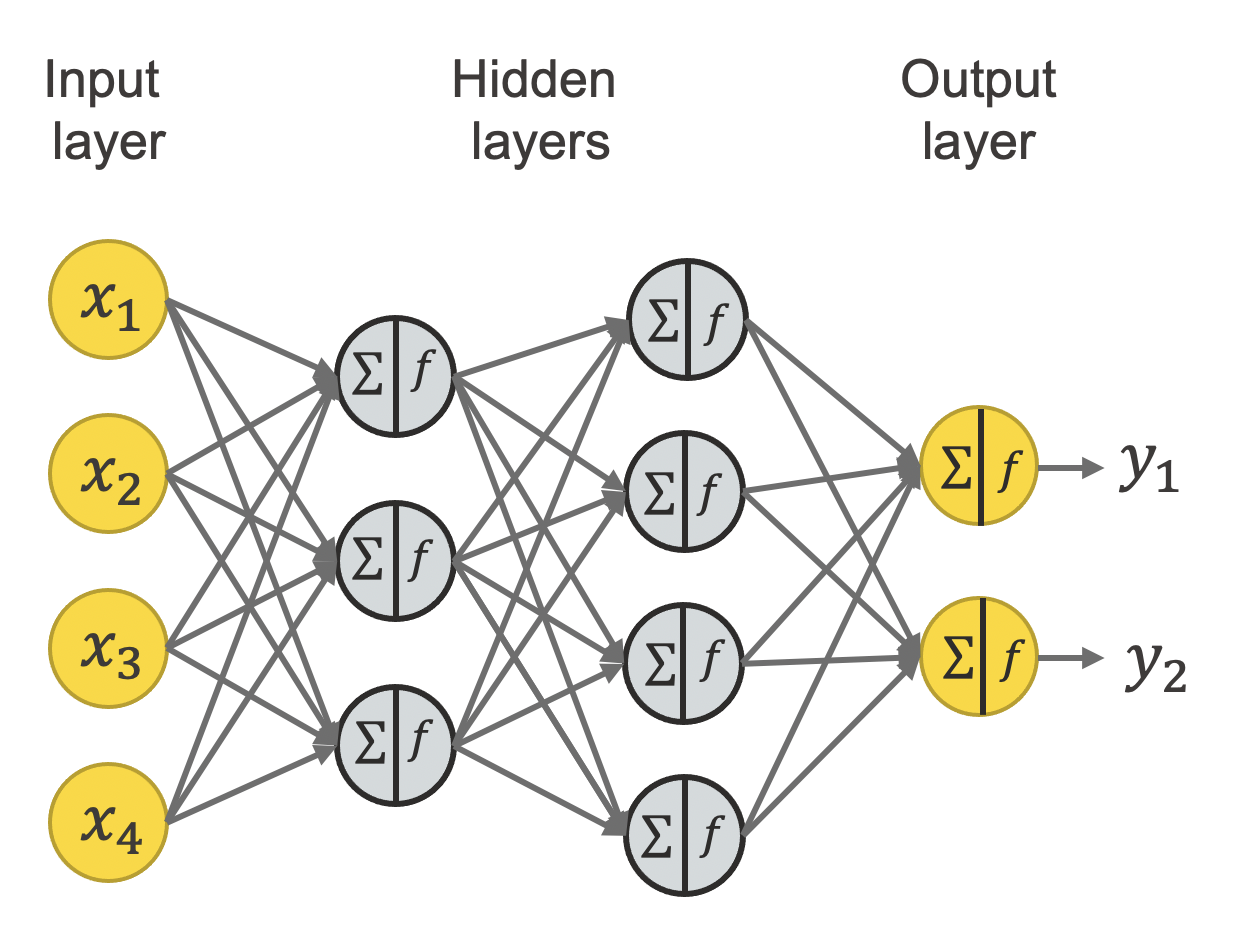

source: Katherin Melcher, knime.com

# DQN implementation



**Network training**

Same as for Q-learning, we first need to intialize our networks, generally with random values (the same weights are assigned to both training and target network). Then come the exploration phase where we let the agent randomly naviguate in the environment, taking actions and gettings rewards accordingly and all the experiences are logged into memory.

Once the memory has been fed with some random exploration, we can begin to exploit our training model. Just like with a Q-table approach, we select an action to take for the current state with ε-greedy action selection. It means that for a given state, we choose the action to take randomly with a probability ε, or we take the action predicted by the training model. As the training model predicts Q-values for every possible action for a given state, we choose the most rewarding action i.e. the action with the highest Q-value.

After having explored a little and gathered some data, we can start the training process of the network. That’s where the memory comes into action.

We randomly sample a batch from the memory experience replay. This batch will be fed into the networks to predict the Q-values. Each experience of the batch represents a state of the environment, the reward the agent got when he took the action stored in memory and the resulting state. So an experience is a tuple (state, action, reward, next state).

**Exploration-Exploitation dilemma**

To obtain a lot of reward, a reinforcement learning agent must prefer actions that it has tried in the past and found to be effective in producing reward. But to discover such actions, it has to try actions that it has not selected before. The agent has to exploit what it has already experienced in order to obtain reward, but it also has to explore in order to make better action selections in the future. The dilemma is that neither exploration nor exploitation can be pursued exclusively without failing at the task. The agent must try a variety of actions and progressively favour those that appear to be best.

The epsilon value is a hyperparameter in DQN that acts as a tradeoff between exploring the environment and exploiting learnt knowledge. It allows us to control how much time would be spent by the agent in performing random actions in order to learn more about the environment in which it operates.

![SegmentLocal](images/cart_dilemma.gif "segment")

**Experience Replay**

The basic idea behind experience replay is to storing past experiences and then using a random subset of these experiences to update the Q-network, rather than using just the single most recent experience. 

Why do we need Experience Replay?

The answer to that is straightforward. We know that neural networks typically take a batch of data. If we trained it with single samples, each sample and the corresponding gradients would have too much variance, and the network weights would never converge.

**Target Network**

An important element of DQN is a target network, a technique
introduced to stabilize learning. A target network is a copy of the
action-value function (or Q-function) that is held constant to serve
as a stable target for learning for some fixed number of timesteps.

![SegmentLocal](images/target_training.png "segment")

Source: Guillaume Androz, https://medium.com

**DQN Algorithm**

Below you can see algorithm for DQN with training and target network and experience replay.

![SegmentLocal](images/dqn_algo.png "segment")

# Deep Q-Learning with MultiTaxi Environment

![SegmentLocal](images/multi_taxi.png "segment")

The Taxis domain is a well-known problem, first introduced in 1998 in article by Thomas G Dietterich where it was shown that HQ-learning can successfully achieve satisfying performance in the problem. In this tutorial, we are using the MultiTaxiEnv library, based and inspired by the original problem which expands the problem to the multi-agent setting. This environment has many degrees of freedom, including control of resources, encouraging collaboration through agents’ constraints, and controlling the reward function. We will observe the simpliest case with 1 taxi, 1 passenger and pickup only on the original map.

As it was mentioned before, we will use DQN implementation from Stable Baselines3, that was initially presented in this paper:

https://arxiv.org/abs/1312.5602

It is based on Fitted Q-Iteration (FQI, a method of MLP training of a Q-value function) and make use of different tricks to stabilize the learning with neural networks: it uses a replay buffer, a target network and gradient clipping. Stable Baselines3 supports 3 different policies for 3 types of input: MLP for approximating function input, CNN for working with images and MultiInput for the cases when dict observations are used as an input.

## DQN on whapped Taxi v3

We will use DQN implementation from Stable-Baselines3 and some wrappers by Guy that will help us to use the single agent taxi environment with openAI's API.

https://github.com/DLR-RM/stable-baselines3/tree/master/stable_baselines3/dqn


This implementation of Deep Q Network (DQN) builds on Fitted Q-Iteration (FQI) and make use of different tricks to stabilize the learning with neural networks: it uses a replay buffer, a target network and gradient clipping.

We will run DQN with base parameters that are listed below:

    def __init__(
        self,
        policy: Union[str, Type[DQNPolicy]],
        env: Union[GymEnv, str],
        learning_rate: Union[float, Schedule] = 1e-4,
        buffer_size: int = 1_000_000,  # 1e6
        learning_starts: int = 50000,
        batch_size: int = 32,
        tau: float = 1.0,
        gamma: float = 0.99,
        train_freq: Union[int, Tuple[int, str]] = 4,
        gradient_steps: int = 1,
        replay_buffer_class: Optional[ReplayBuffer] = None,
        replay_buffer_kwargs: Optional[Dict[str, Any]] = None,
        optimize_memory_usage: bool = False,
        target_update_interval: int = 10000,
        exploration_fraction: float = 0.1,
        exploration_initial_eps: float = 1.0,
        exploration_final_eps: float = 0.05,
        max_grad_norm: float = 10,
        tensorboard_log: Optional[str] = None,
        create_eval_env: bool = False,
        policy_kwargs: Optional[Dict[str, Any]] = None,
        verbose: int = 0,
        seed: Optional[int] = None,
        device: Union[th.device, str] = "auto",
        _init_setup_model: bool = True,
    ):

**Wrapping taxi environment with Guy's wrappers for it to comply with gym specs**

In [15]:
'Environment Related Imports'
import tqdm
import gym
from multi_taxi.taxi_environment import TaxiEnv, orig_MAP
from gym import Wrapper
from gym.spaces import MultiDiscrete

In [16]:
'Deep Model Related Imports'
from torch.nn.functional import one_hot
import torch
import numpy as np
from stable_baselines3 import DQN

In [17]:
class SingleTaxiWrapper(Wrapper):
    """
    A wrapper for multi-taxi environments aligning the environments'
    API with OpenAI Gym if using only 1 taxi.
    """
    def __init__(self, env):
        assert env.num_taxis == 1
        super().__init__(env)

    def reset(self):
        # run `reset` as usual.
        # returned value is a dictionary of observations with a single entry
        obs = self.env.reset()
        
        a, b, _, c, d = self.unwrapped.state
        self.unwrapped.state = [a, b, [[0, 0]], c, d]
        

        # return the single entry value as is.
        # no need for the key (only one agent)
        ret = next(iter(obs.values()))
        
        return ret

    def step(self, action):
        # step using "joint action" of a single agnet as a dictionary
        step_rets = self.env.step({self.env.taxis_names[0]: action})

        # unpack step return values from their dictionaries
        return tuple(next(iter(ret.values())) for ret in step_rets)

In [18]:
class SinglePassengerPosWrapper(Wrapper):
    '''Same for above, when we also have only one passenger'''
    def __init__(self, env, taxi_pos):
        super().__init__(env)
        self.__taxi_pos = taxi_pos
    
    def reset(self):
        obs = self.env.reset()
        a, b, _, c, d = self.unwrapped.state
        self.unwrapped.state = [a, b, [[0, 0]], c, d]
        obs[2:4] = self.__taxi_pos
        return obs

In [19]:
class TaxiObsPrepWrapper(Wrapper):
    '''Preprocess observations to make data more meaningful for deep networks - encode passenger locations as vectors
    (one hot) and scale according to coordinate system dimensions.'''
    def __init__(self, env):
        super().__init__(env)
        self.map_h = len(self.unwrapped.desc) - 2 - 1
        self.map_w = (len(self.unwrapped.desc[0]) - 1) // 2 - 1
    
    def reset(self):
        return self._obs_prep(self.env.reset())
    
    def step(self, action):
        obs, r, d, i = self.env.step(action)
        return self._obs_prep(obs), r, d, i
    
    def _obs_prep(self, obs):
        taxi_and_pass = obs[:-self.unwrapped.num_passengers].astype(np.float64)
        pass_stat = obs[-self.unwrapped.num_passengers:]
        
        taxi_and_pass[::2] = taxi_and_pass[::2] / self.map_h
        taxi_and_pass[1::2] = taxi_and_pass[1::2] / self.map_w
        pass_stat = one_hot(torch.from_numpy(pass_stat).to(torch.int64) - 1, num_classes=3).flatten().numpy().astype(np.float64)
        
        return np.concatenate([taxi_and_pass, pass_stat])
    
    @property
    def observation_space(self):
        obs_space_v = self.env.observation_space.nvec
        taxi_pass_info = obs_space_v[:-self.unwrapped.num_passengers]
        new_obs_space_v = np.concatenate([taxi_pass_info,
                                          [2] * (self.unwrapped.num_taxis + 2) * self.unwrapped.num_passengers])
        
        return MultiDiscrete(new_obs_space_v)
        

In [20]:
env = TaxiEnv(num_taxis=1, num_passengers=1, pickup_only=True, domain_map=orig_MAP)
env = SingleTaxiWrapper(env)
env = SinglePassengerPosWrapper(env, taxi_pos=[0, 0])
env = TaxiObsPrepWrapper(env)

**Training and running our model on wrapped environment**

Source code for DQN model: https://stable-baselines3.readthedocs.io/en/master/_modules/stable_baselines3/dqn/dqn.html#DQN.learn

### DQN Learning

In [21]:
model = DQN("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=100000, log_interval=4)
model.save("dqn_taxi")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 298      |
|    ep_rew_mean      | -196     |
|    exploration rate | 0.887    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 6591     |
|    time_elapsed     | 0        |
|    total timesteps  | 1190     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 197      |
|    ep_rew_mean      | -96.4    |
|    exploration rate | 0.85     |
| time/               |          |
|    episodes         | 8        |
|    fps              | 6587     |
|    time_elapsed     | 0        |
|    total timesteps  | 1579     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 218      |
|    ep_rew_mean      | -117   

### DQN Predicting

In [22]:
model = DQN.load("dqn_taxi")

obs = env.reset()
for i in range(10):
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action) 
    env.render()
    if done:
      obs = env.reset()

+---------+
|P: | : : |
| : | : : |
|_: : : : |
| | : | : |
| | : | : |
+---------+
Taxi0-YELLOW: Fuel: inf, Location: (2,0), Collided: False
Passenger1: Location: (0, 0), Destination: pickup only!
Done: False, {'taxi_0': False, '__all__': False}
Passengers Status's: [2]
+---------+
|P: | : : |
| : | : : |
|_: : : : |
| | : | : |
| | : | : |
+---------+
Taxi0-YELLOW: Fuel: inf, Location: (2,0), Collided: False
Passenger1: Location: (0, 0), Destination: pickup only!
Done: False, {'taxi_0': False, '__all__': False}
Passengers Status's: [2]
+---------+
|P: | : : |
| : | : : |
|_: : : : |
| | : | : |
| | : | : |
+---------+
Taxi0-YELLOW: Fuel: inf, Location: (2,0), Collided: False
Passenger1: Location: (0, 0), Destination: pickup only!
Done: False, {'taxi_0': False, '__all__': False}
Passengers Status's: [2]
+---------+
|P: | : : |
| : | : : |
|_: : : : |
| | : | : |
| | : | : |
+---------+
Taxi0-YELLOW: Fuel: inf, Location: (2,0), Collided: False
Passenger1: Location: (0, 0), Destination:

# Deep Q Learning with OpenAI Simple Environment

![SimpleUrl](https://www.pettingzoo.ml/mpe/mpe_simple.gif "simple_v2")

In this environment a single agent sees a landmark position and is rewarded based on how close it gets to the landmark (Euclidean distance). The space is continous, but agent actions can be both continious and discrete.

### Auxiliary functions and enviroment wrapping

We again are going to use Stable Baselines3 implementation of DQN. Stable Baselines3 suppurts only gym environments, so in order for it to work we need to provide a wrapper trat will make PettingZoo environment compatible with gym.

In [23]:
#from pettingzoo.mpe import simple_speaker_listener_v3
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from PIL import Image
import random

from pettingzoo.mpe import simple_v2
from pettingzoo.utils.wrappers import BaseParallelWraper

from stable_baselines3 import DQN

In [24]:
class SingleAgentParallelEnvGymWrapper(BaseParallelWraper):
    """
    A wrapper for single-agent parallel environments aligning the environments'
    API with OpenAI Gym.
    """

    def reset(self):
        # run `reset` as usual.
        # returned value is a dictionary of observations with a single entry
        obs = self.env.reset()

        # return the single entry value as is.
        # no need for the key (only one agent)
        return next(iter(obs.values()))

    def step(self, action):
        # step using "joint action" of a single agnet as a dictionary
        step_rets = self.env.step({self.env.agents[0]: action})

        # unpack step return values from their dictionaries
        return tuple(next(iter(ret.values())) for ret in step_rets)

    @property  # make property for gym-like access
    def action_space(self, _=None):  # ignore second argument in API
        # get action space of the single agent
        return self.env.action_space(self.env.possible_agents[0])

    @property  # make property for gym-like access
    def observation_space(self, _=None):  # ignore second argument in API
        # get observation space of the single agent
        return self.env.observation_space(self.env.possible_agents[0])

In [25]:
from pettingzoo.mpe import simple_v2
from pettingzoo.utils.wrappers import BaseParallelWraper

simple_gym_env = simple_v2.parallel_env(max_cycles=10, continuous_actions=False)
simple_gym_env = SingleAgentParallelEnvGymWrapper(simple_gym_env)

### DQN Learning

Now we can create an MLP and apply Deep Q-Learning

In [26]:
model = DQN("MlpPolicy", simple_gym_env, verbose=1)
model.learn(total_timesteps=10000, log_interval=4)
model.save("dqn_speaker")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10       |
|    ep_rew_mean      | -6.83    |
|    exploration rate | 0.962    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 5501     |
|    time_elapsed     | 0        |
|    total timesteps  | 40       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10       |
|    ep_rew_mean      | -14.4    |
|    exploration rate | 0.924    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 5589     |
|    time_elapsed     | 0        |
|    total timesteps  | 80       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10       |
|    ep_rew_mean      | -10.2  

### DQN Predicting

Here we load our pretrained model and use its predictions to control the agent

In [27]:
model = DQN.load("dqn_speaker")

obs = simple_gym_env.reset()
for i in range(1000):
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, info = simple_gym_env.step(action)
    simple_gym_env.render()
    if done:
      obs = simple_gym_env.reset()

# References:

Wikipedia: https://en.wikipedia.org/wiki/Q-learning

Mike Wang on miniDQN: https://towardsdatascience.com/deep-q-learning-tutorial-mindqn-2a4c855abffc

Guillaume Androz on DQN: https://medium.com/mlearning-ai/deep-q-learning-with-pytorch-and-openai-gym-the-taxi-cab-puzzle-e7a3028f732

Stable Baselines3: https://stable-baselines3.readthedocs.io/en/master/modules/dqn.html

PettingZoo: https://www.pettingzoo.ml/mpe/simple

SuperSuit: https://pypi.org/project/SuperSuit/

MultiTaxi: https://github.com/sarah-keren/multi_taxi

OpenAI Taxi-v3: https://gym.openai.com/envs/Taxi-v3/